In [1]:
import sys
sys.path.append('/path/to/GenerativeNetworkModels')


import importlib
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import GNM
importlib.reload(GNM)
from GNM import GenerativeNetworkModel

import generative_rules
importlib.reload(generative_rules)

num_nodes = 100
num_seed_edges = 250

seed_adjacency_matrix = torch.zeros(num_nodes, num_nodes)
# Randomly select seed edges
seed_edge_indices = torch.randint(0, num_nodes, (num_seed_edges, 2))
seed_adjacency_matrix[seed_edge_indices[:, 0], seed_edge_indices[:, 1]] = 1
seed_adjacency_matrix[seed_edge_indices[:, 1], seed_edge_indices[:, 0]] = 1
# Remove diagonals
seed_adjacency_matrix.fill_diagonal_(0)

# Set the distance matrix to all ones
distance_matrix = torch.ones(num_nodes, num_nodes)
distance_matrix.fill_diagonal_(0)

# Set other parameters
eta = 1
gamma = 1
distance_relationship_type = "exponential"
matching_relationship_type = "exponential"

gmn = GenerativeNetworkModel(seed_adjacency_matrix = seed_adjacency_matrix,
                distance_matrix = distance_matrix,
                eta = eta,
                gamma = gamma,
                lambdah = 1,
                distance_relationship_type = distance_relationship_type,
                matching_relationship_type = matching_relationship_type,
                alpha = 0.01, 
                optimisation_criterion_kwargs = {"omega":1},
                optimisation_normalisation=False
)

Optimisation criterion was unspecified. Defaulting to 'distance_weighted_communicability'.
Weight lower bound was unspecified. Defaulting to 0.0.
Weight upper bound was unspecified. Defaulting to infinity.


100%|██████████| 1000/1000 [00:05<00:00, 198.96it/s]


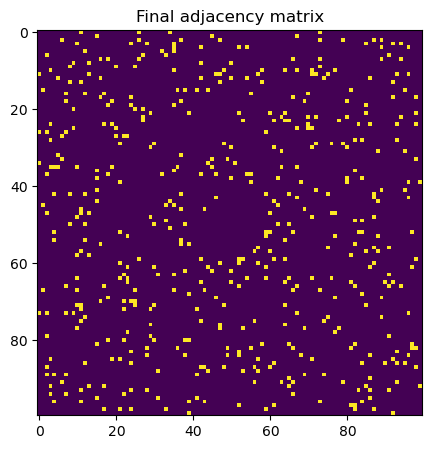

In [3]:
added_edges_list, adjacency_snapshot, weight_snapshots = gmn.train_loop(num_iterations = 1000, binary_updates_per_iteration=0, weighted_updates_per_iteration=1)

plt.figure(figsize=(5, 5))
plt.imshow(gmn.adjacency_matrix.numpy())
plt.title("Final adjacency matrix")
plt.show()